In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [14]:
df = pd.read_csv('data\\clean_tabular_data.csv')
df = df.select_dtypes(exclude = 'object')
df

guests  beds  bathrooms  Price_Night  Cleanliness_rate  Accuracy_rate  \
0       2.0   1.0        1.0        105.0               4.6            4.7   
1       3.0   3.0        0.0         92.0               4.3            4.7   
2       4.0   2.0        1.5         52.0               4.2            4.6   
3       2.0   1.0        1.0        132.0               4.8            4.9   
4       4.0   3.0        1.0        143.0               5.0            4.9   
..      ...   ...        ...          ...               ...            ...   
825     4.0   2.0        1.5        240.0               4.9            5.0   
826     2.0   1.0        1.0         78.0               4.8            5.0   
827     4.0   2.0        1.5        113.0               4.8            5.0   
828     6.0   3.0        2.0         80.0               4.7            4.8   
829     4.0   2.0        1.0        104.0               4.9            4.9   

     Communication_rate  Location_rate  Check-in_rate  Value_rate  \
0                   4.3            5.0            4.3         4.3   
1                   4.6            4.9            4.7         4.5   
2                   4.8            4.8            4.8         4.7   
3                   4.9            4.9            5.0         4.6   
4                   5.0            4.7            5.0         4.7   
..                  ...            ...            ...         ...   
825                 5.0            5.0            4.9         4.8   
826                 4.9            4.9            5.0         4.9   
827                 5.0            5.0            5.0         4.8   
828                 5.0            5.0            5.0         4.7   
829                 4.9            4.9            4.9         4.3   

     amenities_count  bedrooms  
0               13.0       1.0  
1                8.0       1.0  
2               51.0       1.0  
3               23.0       1.0  
4               32.0       2.0  
..               ...       ...  
825             33.0       2.0  
826             54.0       1.0  
827             38.0       2.0  
828             24.0       2.0  
829             29.0       2.0  

[830 rows x 12 columns]

<AxesSubplot:>

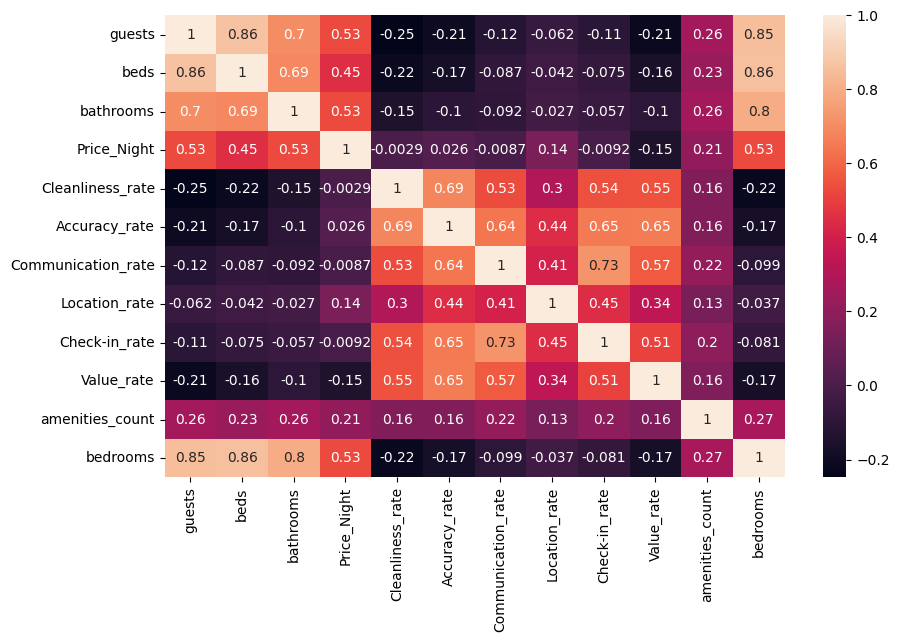

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df_cor = df.corr()
%matplotlib inline
plt.figure(figsize = (10, 6))
sns.heatmap(df_cor, annot = True)

In [16]:
variance = VarianceThreshold(threshold = (0.9 * (1 - 0.9)))
variance.fit(df)

variance.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False,  True,  True])

In [17]:
df = df.drop(columns = ['Cleanliness_rate', 'Accuracy_rate', 'Communication_rate', 'Location_rate', 'Check-in_rate'], axis = 1)
df

guests  beds  bathrooms  Price_Night  Value_rate  amenities_count  \
0       2.0   1.0        1.0        105.0         4.3             13.0   
1       3.0   3.0        0.0         92.0         4.5              8.0   
2       4.0   2.0        1.5         52.0         4.7             51.0   
3       2.0   1.0        1.0        132.0         4.6             23.0   
4       4.0   3.0        1.0        143.0         4.7             32.0   
..      ...   ...        ...          ...         ...              ...   
825     4.0   2.0        1.5        240.0         4.8             33.0   
826     2.0   1.0        1.0         78.0         4.9             54.0   
827     4.0   2.0        1.5        113.0         4.8             38.0   
828     6.0   3.0        2.0         80.0         4.7             24.0   
829     4.0   2.0        1.0        104.0         4.3             29.0   

     bedrooms  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         2.0  
..        ...  
825       2.0  
826       1.0  
827       2.0  
828       2.0  
829       2.0  

[830 rows x 7 columns]

In [18]:
from pandas_profiling import ProfileReport

pr = ProfileReport(df, title = 'AirBnB correlations', html = {'style': {'full_width': True }})
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df = df.drop(columns = ['beds', 'bedrooms', 'bathrooms'], axis = 1)
df

guests  Price_Night  Value_rate  amenities_count
0       2.0        105.0         4.3             13.0
1       3.0         92.0         4.5              8.0
2       4.0         52.0         4.7             51.0
3       2.0        132.0         4.6             23.0
4       4.0        143.0         4.7             32.0
..      ...          ...         ...              ...
825     4.0        240.0         4.8             33.0
826     2.0         78.0         4.9             54.0
827     4.0        113.0         4.8             38.0
828     6.0         80.0         4.7             24.0
829     4.0        104.0         4.3             29.0

[830 rows x 4 columns]

In [20]:
df_corr = df.corr()
df_corr

guests  Price_Night  Value_rate  amenities_count
guests           1.000000     0.528578   -0.211432         0.256422
Price_Night      0.528578     1.000000   -0.148047         0.208879
Value_rate      -0.211432    -0.148047    1.000000         0.155814
amenities_count  0.256422     0.208879    0.155814         1.000000

<AxesSubplot:>

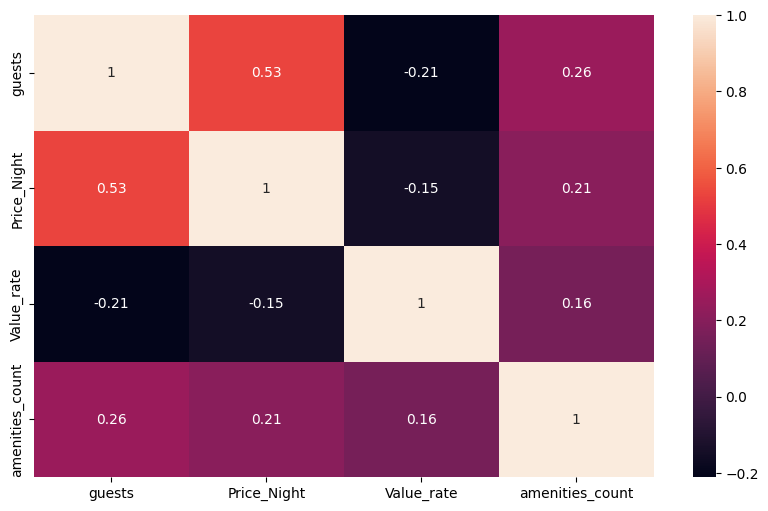

In [21]:
%matplotlib inline
plt.figure(figsize = (10, 6))
sns.heatmap(df_corr, annot = True)

In [22]:
df.describe()


guests  Price_Night  Value_rate  amenities_count
count  830.000000   830.000000  830.000000       830.000000
mean     3.914458   154.172289    4.769036        35.501205
std      2.377246   129.082913    0.174952        14.221304
min      1.000000     8.000000    3.700000         3.000000
25%      2.000000    83.250000    4.700000        25.000000
50%      4.000000   120.000000    4.800000        35.000000
75%      5.000000   176.750000    4.900000        44.000000
max     16.000000  1132.000000    5.000000        84.000000

In [23]:
df.sort_values(by = 'Price_Night', ascending = False)

guests  Price_Night  Value_rate  amenities_count
712     9.0       1132.0         4.4             40.0
605    16.0       1112.0         4.8             71.0
766    10.0        956.0         5.0             62.0
638     9.0        876.0         4.7             19.0
810    10.0        795.0         4.8             34.0
..      ...          ...         ...              ...
597     3.0         11.0         4.7             22.0
128     3.0         10.0         4.7             10.0
180     5.0          9.0         4.3             42.0
572     2.0          8.0         4.8             22.0
641     3.0          8.0         4.7             23.0

[830 rows x 4 columns]